# **Stock Price Prediction Using Google Stocks Dataset**

**Introduction**

The "**Stock Price Prediction**" project employs advanced machine learning techniques to forecast future stock prices based on historical data from **Google's stock market performance**. Leveraging **Long Short-Term Memory** (**LSTM**) neural networks, a type of recurrent neural network (**RNN**) well-suited for sequence prediction, this project explores the application of deep learning in financial forecasting. By analyzing past trends and patterns in Google's stock prices, the LSTM model aims to provide insights into potential future price movements. This documentation details the methodology, implementation, and results of applying LSTM networks to predict Google's stock prices, highlighting the model's accuracy and effectiveness in financial prediction tasks.

**Import Basic Libraries:**

Import essential libraries such as **numpy** and **pandas** for numerical computations and data manipulation.

In [54]:
# 1) Import Basic Libraries
import numpy as np
import pandas as pd

**Load and Preprocess Data:**

Load historical stock price data.
Preprocess the data, including handling missing values, scaling features, and splitting the data into training and testing sets.

In [55]:
# 2) Import the Google Stock Price Prediction Dataset from your Local files to Google colab
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('GOOG.csv')

Saving GOOG.csv to GOOG (1).csv


In [56]:
# 3) Check the dataset is loaded correctly by checking it's first 5 entries of the dataset
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [57]:
# 4) Check the size of the Dataset
print(df.shape)

(1258, 14)


In [58]:
# 5) Check the info in your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [59]:
# 6) Check the null values that are available in your dataset
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [60]:
# 7) Import other import libraries to continue with our model training
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [61]:
# 8) Iam gonna convert the Date column to a nice format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date')

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,GOOG,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,GOOG,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,GOOG,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,GOOG,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,GOOG,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07 00:00:00+00:00,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08 00:00:00+00:00,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09 00:00:00+00:00,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [62]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [63]:
# 9) Selecting the 'Close' column as it contains the stock prices
df = df[['date', 'close']]

In [64]:
print(df.columns)

Index(['date', 'close'], dtype='object')


In [65]:
# 10) Calculate IQR to detect outliers in the 'close' column
Q1 = df['close'].quantile(0.25)
Q3 = df['close'].quantile(0.75)
IQR = Q3 - Q1


In [66]:
# 11) Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [67]:
# 12) Identify outliers
outliers = df[(df['close'] < lower_bound) | (df['close'] > upper_bound)]

In [68]:
# 13) Display the outliers
print("Outliers:")
print(outliers)

Outliers:
                          date    close
1168 2021-02-03 00:00:00+00:00  2070.07
1169 2021-02-04 00:00:00+00:00  2062.37
1170 2021-02-05 00:00:00+00:00  2098.00
1171 2021-02-08 00:00:00+00:00  2092.91
1172 2021-02-09 00:00:00+00:00  2083.51
...                        ...      ...
1253 2021-06-07 00:00:00+00:00  2466.09
1254 2021-06-08 00:00:00+00:00  2482.85
1255 2021-06-09 00:00:00+00:00  2491.40
1256 2021-06-10 00:00:00+00:00  2521.60
1257 2021-06-11 00:00:00+00:00  2513.93

[90 rows x 2 columns]


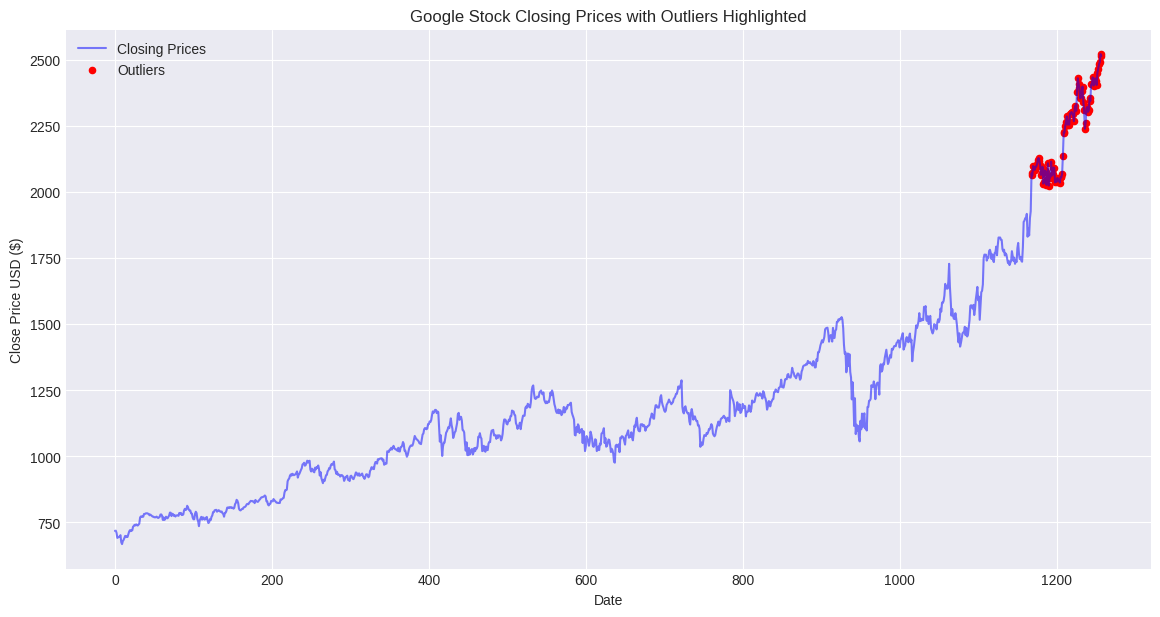

In [69]:
# 14) Visualize the outliers using a box plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Closing Prices', color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers['close'], color='red', label='Outliers', s=20)
plt.title('Google Stock Closing Prices with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-70-53ca93d94ae9>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


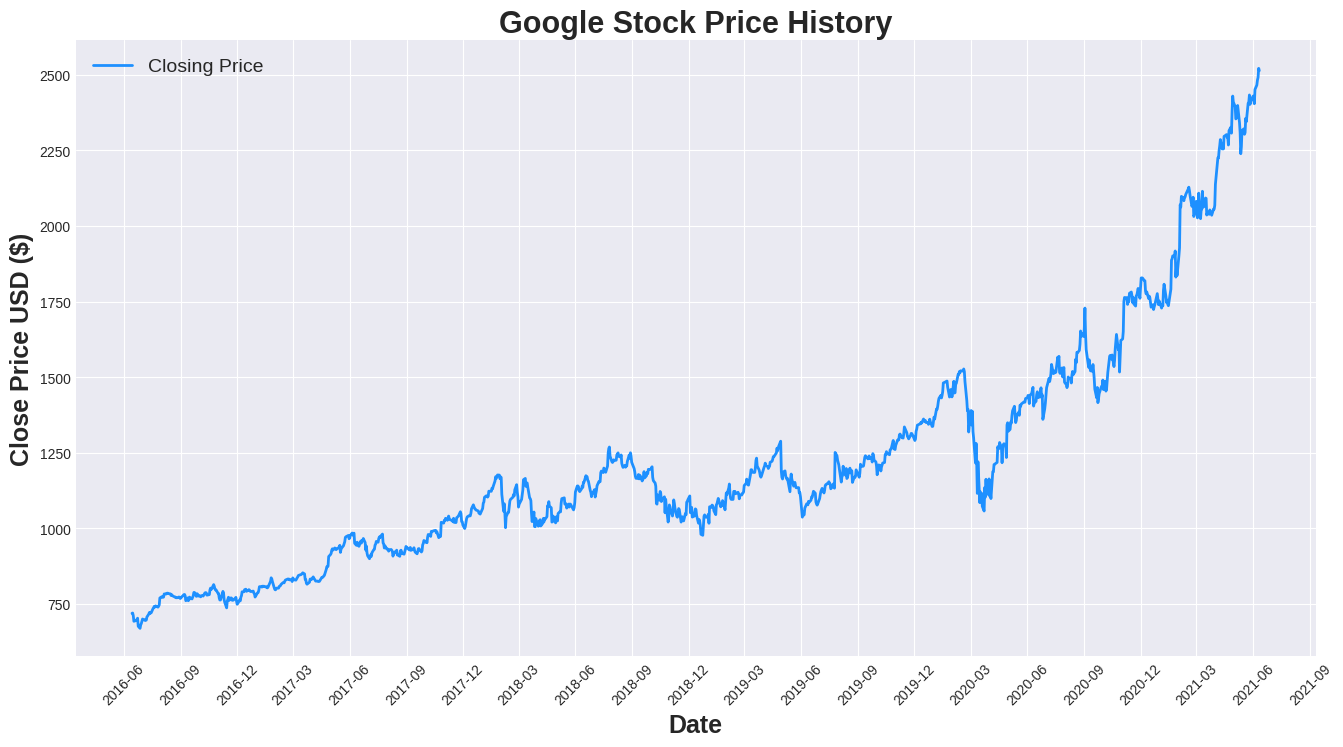

In [70]:
# 15) Plot the closing price history
import matplotlib.dates as mdates

# Set the style of the plot to 'seaborn-darkgrid'
plt.style.use('seaborn-darkgrid')

# Create a figure with a larger size
plt.figure(figsize=(16, 8))

# Plot the closing price history
plt.plot(df['date'], df['close'], label='Closing Price', color='dodgerblue', linewidth=2)

# Set the title and labels with increased font size for better readability
plt.title('Google Stock Price History', fontsize=22, weight='bold')
plt.xlabel('Date', fontsize=18, weight='bold')
plt.ylabel('Close Price USD ($)', fontsize=18, weight='bold')

# Format the x-axis to show the date more clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(True)

# Add a legend to the plot
plt.legend(fontsize=14)

# Display the plot
plt.show()

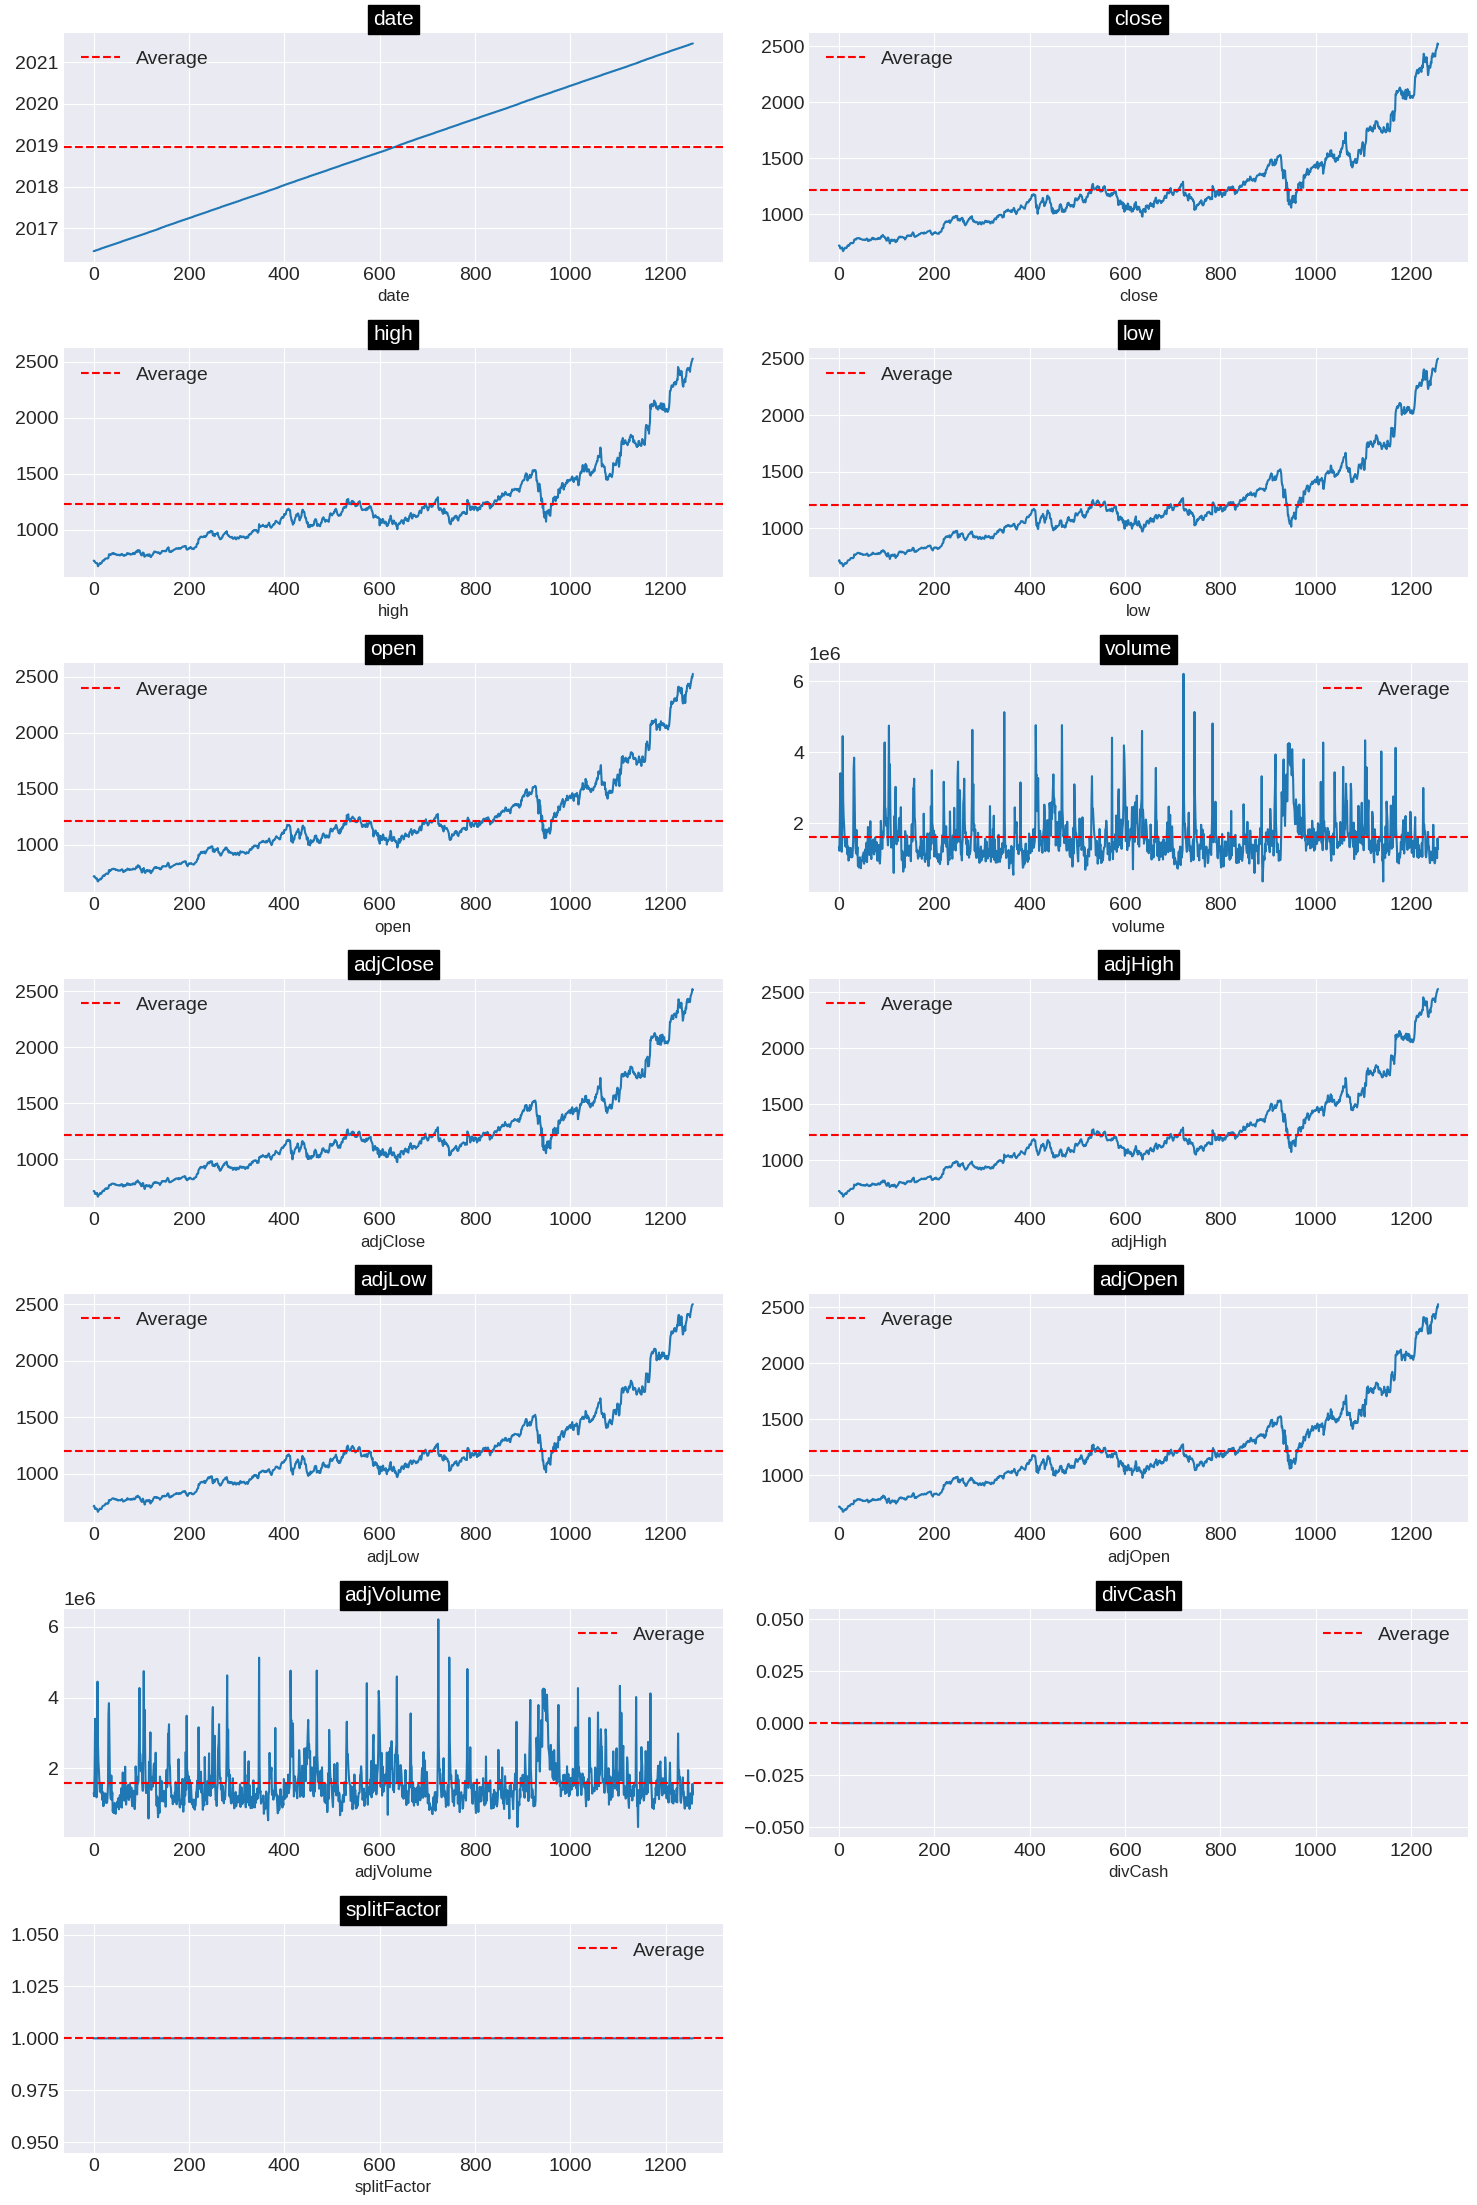

In [111]:
plt.figure(figsize=(15, 25))
for idx, column in enumerate(df):
    plt.subplot(8, 2, idx + 1)
    plt.plot(df.index.values, df[column])
    #Adding a horizontal line for the average of the column
    plt.axhline(df[column].mean(), color='red', linestyle='--', label='Average')
    plt.title(column, backgroundcolor='black', color='white', fontsize=15)
    plt.xlabel(column, size=12)
    plt.legend()
plt.tight_layout()
plt.show()

In [110]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [109]:
df = df.drop(['symbol'],axis=1)

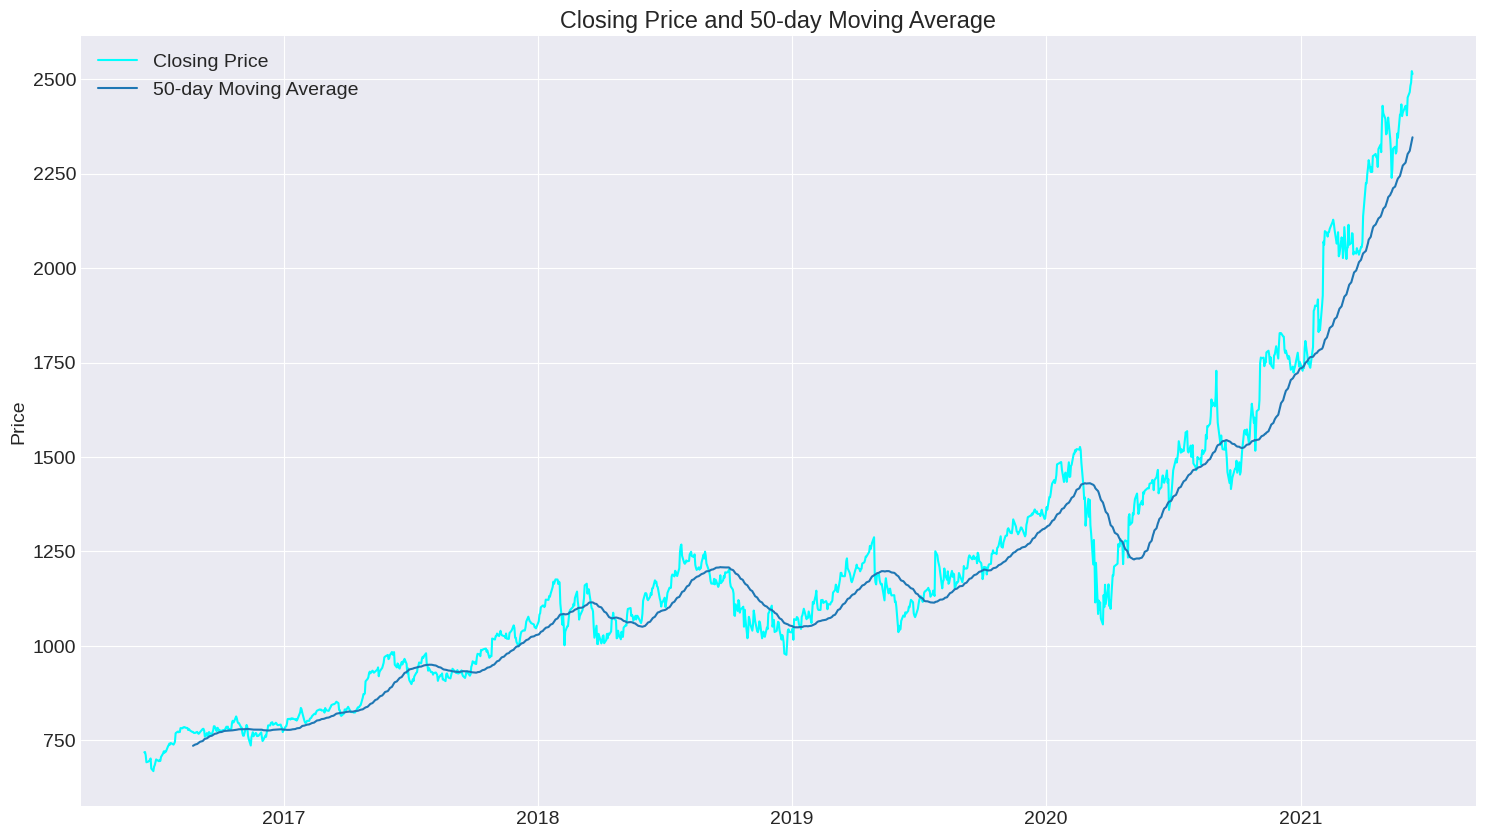

In [114]:
rolling_avg = df['close'].rolling(window=50).mean()

plt.plot(df['date'], df['close'], label='Closing Price',color='cyan')
plt.plot(df['date'], rolling_avg, label='50-day Moving Average')
plt.ylabel('Price')
plt.title('Closing Price and 50-day Moving Average')
plt.legend()
plt.show()

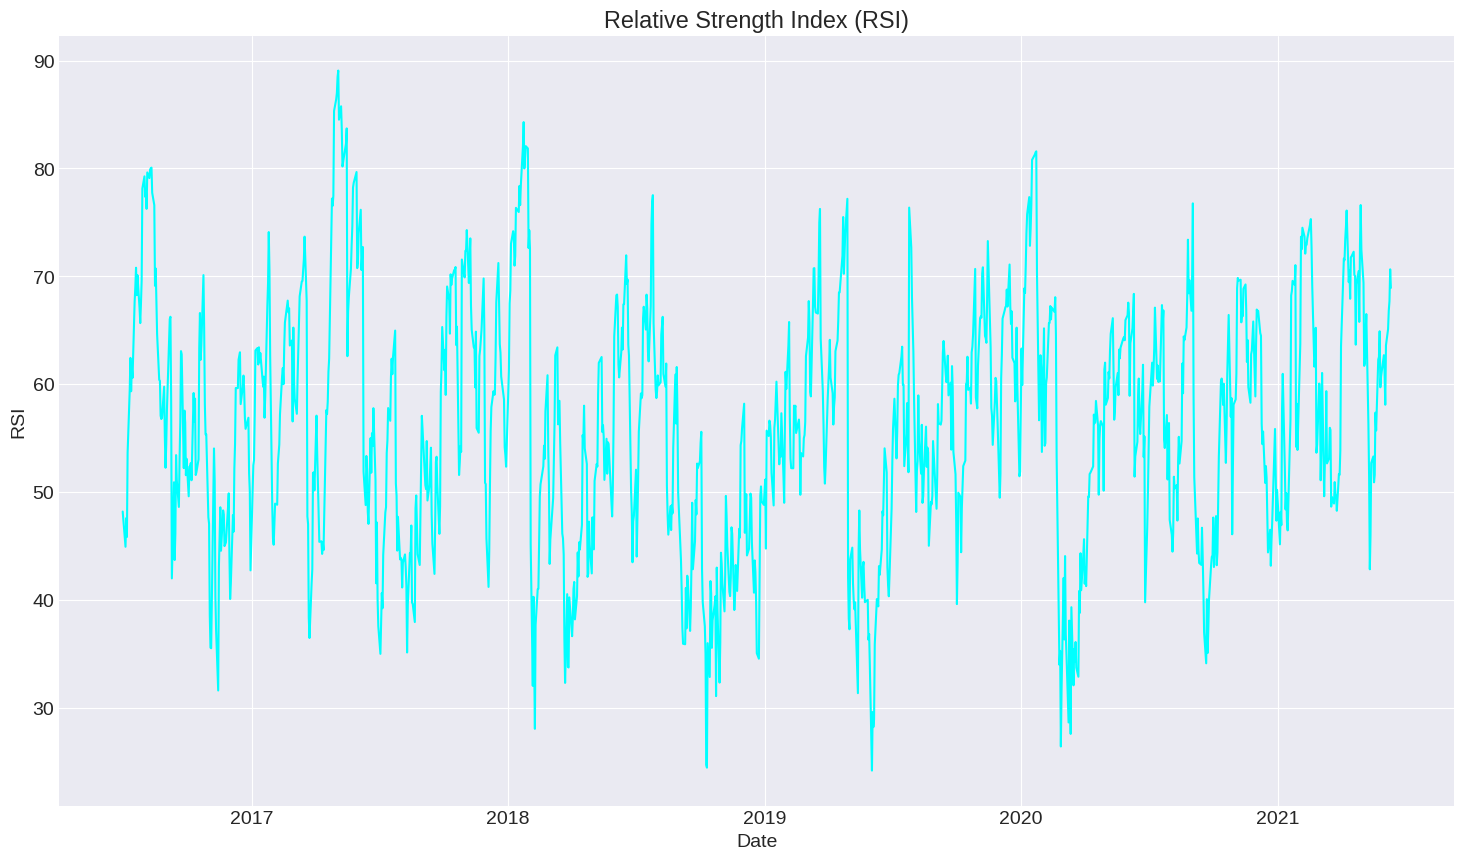

In [120]:
import ta
rsi = ta.momentum.RSIIndicator(df['close']).rsi()

plt.plot(df['date'], rsi, color='cyan')  # Change the color to red
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.show()

<Axes: >

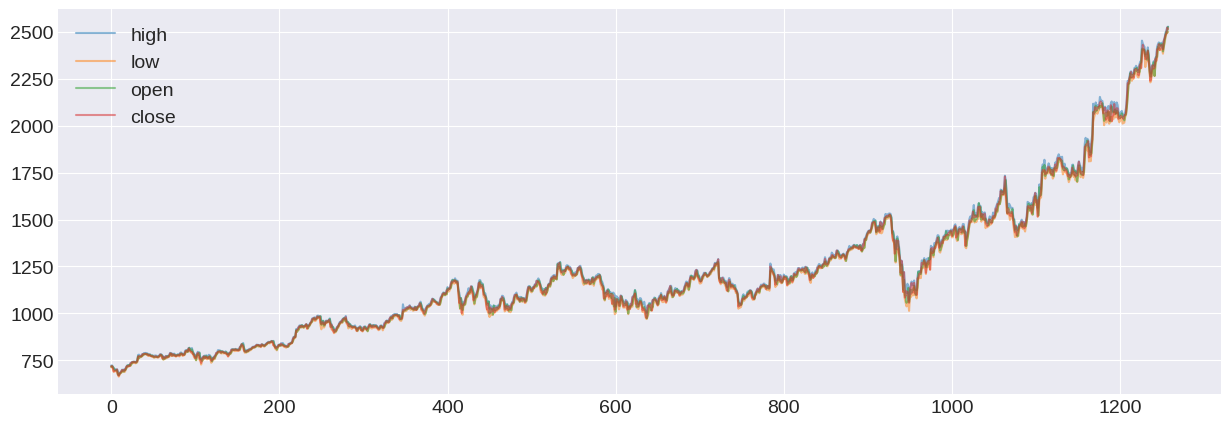

In [121]:
df[['high','low','open','close']].plot(figsize = (15, 5), alpha = 0.5)
###he alpha parameter adjusts the transparency of the lines, with 0.5 indicating 50% transparency.

In [71]:
df.duplicated().sum()

0

**Create LSTM Model:**

Define the LSTM model architecture using a deep learning framework like TensorFlow or Keras.
Compile the model with an appropriate optimizer and loss function.

In [72]:
# 16) Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1, 1))

In [73]:
print(scaler)

MinMaxScaler()


In [74]:
df.to_csv('modified_Google_stocks_prediction.csv', index = False)

In [75]:
from google.colab import files
files.download('modified_Google_stocks_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
print(len(scaled_data))

1258


In [77]:
print(int(np.ceil(len(scaled_data)*0.8)))

1007


In [78]:
# 17) Average length of the Training data
training_data_len = int(np.ceil(len(scaled_data)*0.8))

In [79]:
# 18) Splitting Training and Testing Data
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60:, :]

In [80]:
# 19) Creating a training Dataset
def create_dataset(dataset, time_step=1):
  X, Y = [], []
  for i in range(len(dataset)-time_step-1):
    X.append(dataset[i:(i+time_step), 0])
    Y.append(dataset[i + time_step, 0])
  return np.array(X), np.array(Y)

In [81]:
# 20) Creating the Dataset
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [82]:
print(X_train)

[[0.02698372 0.02733443 0.02271575 ... 0.05568325 0.06033432 0.06048   ]
 [0.02733443 0.02271575 0.01265823 ... 0.06033432 0.06048    0.05776598]
 [0.02271575 0.01265823 0.01373196 ... 0.06048    0.05776598 0.04931637]
 ...
 [0.29755469 0.22449739 0.24363581 ... 0.40139424 0.41553628 0.41997151]
 [0.22449739 0.24363581 0.23122579 ... 0.41553628 0.41997151 0.42512437]
 [0.24363581 0.23122579 0.24120237 ... 0.41997151 0.42512437 0.43035277]]


In [83]:
# 21) Reshaping the Dataset for Training and Testing
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [84]:
print(X_test)

[[[0.24120237]
  [0.2180172 ]
  [0.20954601]
  ...
  [0.43035277]
  [0.39689426]
  [0.40193381]]

 [[0.2180172 ]
  [0.20954601]
  [0.25154586]
  ...
  [0.39689426]
  [0.40193381]
  [0.40553271]]

 [[0.20954601]
  [0.25154586]
  [0.23429592]
  ...
  [0.40193381]
  [0.40553271]
  [0.4178726 ]]

 ...

 [[0.75197212]
  [0.75443793]
  [0.76848285]
  ...
  [0.93687613]
  [0.96231668]
  [0.97004867]]

 [[0.75443793]
  [0.76848285]
  [0.76770587]
  ...
  [0.96231668]
  [0.97004867]
  [0.9790918 ]]

 [[0.76848285]
  [0.76770587]
  [0.73810526]
  ...
  [0.97004867]
  [0.9790918 ]
  [0.98370509]]]


**Train the Model:**

Train the LSTM model on the training data.
Monitor the model's performance on validation data to prevent overfitting.

In [85]:
# 22) Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [86]:
# 23) Model compiling using Optimizer and Loss Function
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [87]:
# 24) Model Fitting
model.fit(X_train, Y_train, batch_size = 1, epochs = 1)

946/946 [==============================] - 30s 27ms/step - loss: 8.8391e-04


In [88]:
# 25) Getting the model Prediction Values
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

8/8 [==============================] - 0s 14ms/step


In [123]:
# Preparing the actual stock prices and predicted stock prices for plotting
actual_stock_prices = scaler.inverse_transform(scaled_data)

In [89]:
# 26) Getting the model's Actual Prediction Values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [90]:
# 27) Plotting the Data
train = df[:training_data_len]
valid = df[training_data_len:training_data_len+len(test_predict)].copy()
valid.loc[:, 'Predictions'] = test_predict

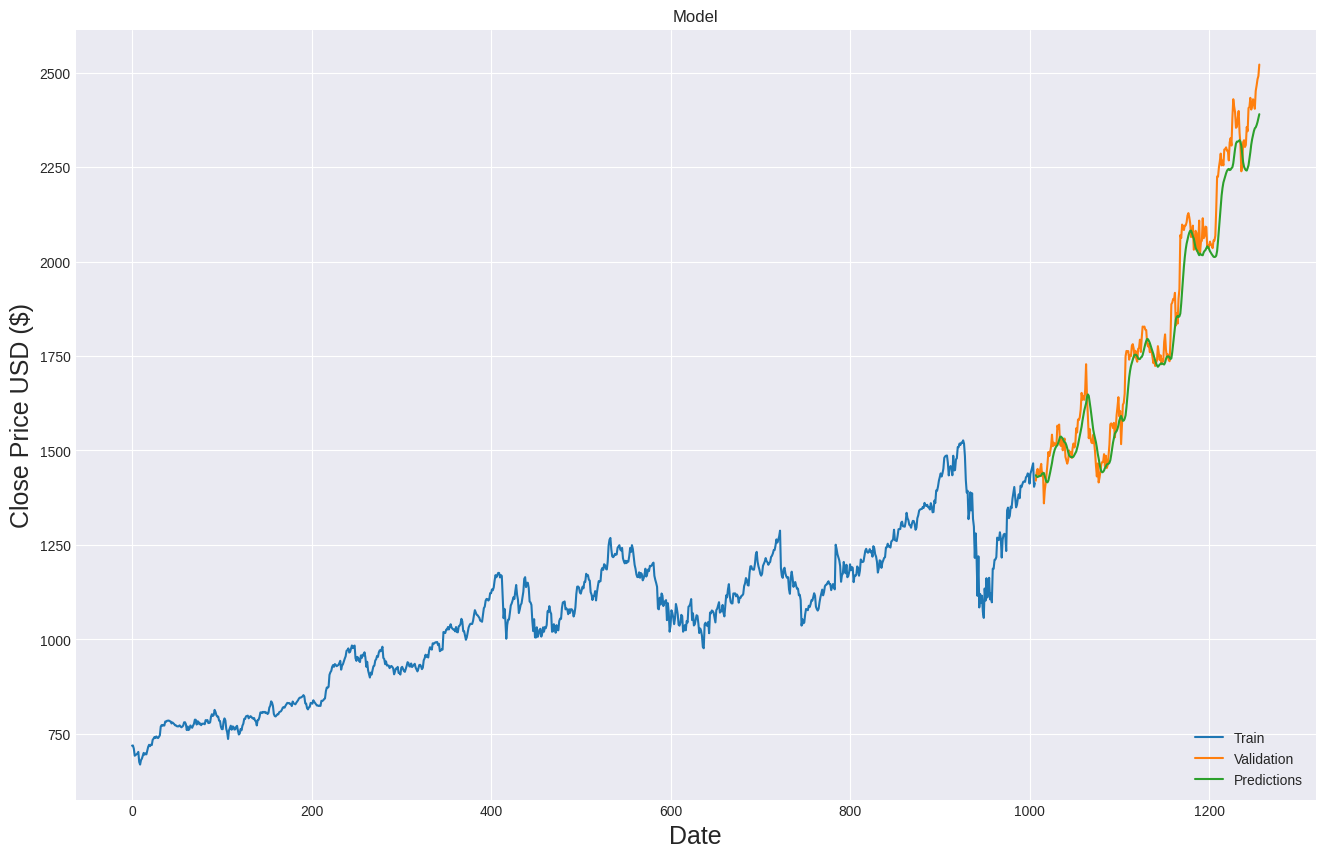

In [91]:
# 28) Visualizing the Data
plt.figure(figsize=(16,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show()

In [92]:
# 29) Importing Mean Squared Error to Calculate the Root Mean Squared Error
from sklearn.metrics import mean_squared_error
import math

**Evaluate the Model:**

Evaluate the model's performance on the testing data.
Use metrics like **Mean Squared Error (MSE)** to assess prediction accuracy.

In [93]:
# 30) Checking the Root Mean Squared Error
rmse = math.sqrt(mean_squared_error(valid['close'], valid['Predictions']))
print(rmse)

66.32761033892818


In [94]:
# Just checking the predicted Pattern
test_predict = model.predict(X_test)

test_predict = scaler.inverse_transform(test_predict)

print(test_predict)

8/8 [==============================] - 0s 16ms/step
[[1434.3314]
 [1430.537 ]
 [1429.626 ]
 [1431.1796]
 [1432.1359]
 [1432.2957]
 [1434.3357]
 [1438.4904]
 [1439.588 ]
 [1440.1892]
 [1431.1621]
 [1422.38  ]
 [1416.5432]
 [1415.5635]
 [1420.207 ]
 [1430.8026]
 [1442.1569]
 [1454.0447]
 [1466.6151]
 [1481.6412]
 [1492.6583]
 [1501.5364]
 [1507.3748]
 [1511.4155]
 [1513.6578]
 [1520.434 ]
 [1527.679 ]
 [1535.5679]
 [1536.7091]
 [1533.9795]
 [1531.5646]
 [1525.9535]
 [1521.9164]
 [1520.0873]
 [1513.9883]
 [1505.627 ]
 [1495.941 ]
 [1487.6646]
 [1484.0463]
 [1482.5564]
 [1482.6562]
 [1481.8435]
 [1483.7975]
 [1488.2622]
 [1492.3273]
 [1497.0145]
 [1506.1613]
 [1515.187 ]
 [1527.2091]
 [1539.15  ]
 [1550.6404]
 [1562.8809]
 [1579.1738]
 [1593.3827]
 [1606.1661]
 [1615.4165]
 [1624.8661]
 [1641.0947]
 [1648.315 ]
 [1644.4774]
 [1628.5319]
 [1611.1173]
 [1591.6252]
 [1571.9935]
 [1554.3538]
 [1542.3235]
 [1532.1602]
 [1521.4379]
 [1507.7905]
 [1491.11  ]
 [1478.8152]
 [1464.3384]
 [1452.1649]

In [95]:
for prediction in test_predict:
    print(prediction[0])

1434.3314
1430.537
1429.626
1431.1796
1432.1359
1432.2957
1434.3357
1438.4904
1439.588
1440.1892
1431.1621
1422.38
1416.5432
1415.5635
1420.207
1430.8026
1442.1569
1454.0447
1466.6151
1481.6412
1492.6583
1501.5364
1507.3748
1511.4155
1513.6578
1520.434
1527.679
1535.5679
1536.7091
1533.9795
1531.5646
1525.9535
1521.9164
1520.0873
1513.9883
1505.627
1495.941
1487.6646
1484.0463
1482.5564
1482.6562
1481.8435
1483.7975
1488.2622
1492.3273
1497.0145
1506.1613
1515.187
1527.2091
1539.15
1550.6404
1562.8809
1579.1738
1593.3827
1606.1661
1615.4165
1624.8661
1641.0947
1648.315
1644.4774
1628.5319
1611.1173
1591.6252
1571.9935
1554.3538
1542.3235
1532.1602
1521.4379
1507.7905
1491.11
1478.8152
1464.3384
1452.1649
1444.4381
1442.1471
1443.5623
1446.927
1453.401
1457.181
1462.4832
1464.1504
1464.6526
1467.3303
1474.0541
1488.2329
1504.8595
1520.5693
1533.0342
1544.0085
1548.3374
1551.2673
1557.2264
1566.3889
1579.0674
1586.0928
1591.2448
1584.3936
1578.3494
1579.2289
1583.89
1592.8799
1614.7317
1

In [96]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=50))
model.add(Dense(units=1))

In [97]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [98]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
30/30 [==============================] - 9s 130ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 2/50
30/30 [==============================] - 3s 85ms/step - loss: 6.9008e-04 - val_loss: 0.0016
Epoch 3/50
30/30 [==============================] - 3s 85ms/step - loss: 6.1755e-04 - val_loss: 0.0013
Epoch 4/50
30/30 [==============================] - 3s 87ms/step - loss: 5.8894e-04 - val_loss: 0.0011
Epoch 5/50
30/30 [==============================] - 4s 123ms/step - loss: 5.4964e-04 - val_loss: 0.0018
Epoch 6/50
30/30 [==============================] - 3s 84ms/step - loss: 5.8924e-04 - val_loss: 0.0024
Epoch 7/50
30/30 [==============================] - 3s 85ms/step - loss: 5.3402e-04 - val_loss: 0.0012
Epoch 8/50
30/30 [==============================] - 3s 84ms/step - loss: 4.9701e-04 - val_loss: 0.0021
Epoch 9/50
30/30 [==============================] - 3s 99ms/step - loss: 4.4574e-04 - val_loss: 0.0017
Epoch 10/50
30/30 [==============================] - 3s 110ms/step - loss: 

**Make Predictions:**



*   Use the trained LSTM model to make stock price predictions.
*   Compare predicted prices with actual prices to visualize the model's performance.

In [99]:
test_predict = model.predict(X_test)
rmse = math.sqrt(mean_squared_error(Y_test, test_predict))
print('RMSE:', rmse)

8/8 [==============================] - 1s 26ms/step
RMSE: 0.02127957762440371


In [100]:
from sklearn.model_selection import KFold
import numpy as np

# Assuming X_train and y_train are your training data and labels

# Initialize KFold with number of folds (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store RMSE for each fold
rmse_scores = []

# Iterate over each fold
for train_index, val_index in kf.split(X_train):
    # Split data into train and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = Y_train[train_index], Y_train[val_index]

    # Train your model on X_train_fold, y_train_fold
    # Evaluate your model on X_val_fold, y_val_fold
    # Example: train and evaluate your LSTM model
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
    val_predict = model.predict(X_val_fold)

    # Calculate RMSE for this fold
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predict))
    rmse_scores.append(fold_rmse)

    # Optionally, you can also print or store other metrics like MAE, R2 score, etc.
    print(f"Fold RMSE: {fold_rmse}")

# Calculate average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print(f"Average RMSE across {kf.n_splits} folds: {average_rmse}")


6/6 [==============================] - 0s 28ms/step
Fold RMSE: 0.01263007194774245
6/6 [==============================] - 0s 27ms/step
Fold RMSE: 0.009353715094919012
6/6 [==============================] - 0s 26ms/step
Fold RMSE: 0.010580259827883727
6/6 [==============================] - 0s 28ms/step
Fold RMSE: 0.00948993334308985
6/6 [==============================] - 0s 28ms/step
Fold RMSE: 0.012740432314289847
Average RMSE across 5 folds: 0.010958882505584978


**Visualize Results:**

Plot the actual vs. predicted stock prices to visualize the model's effectiveness.
Use visualization libraries such as matplotlib to create these plots.

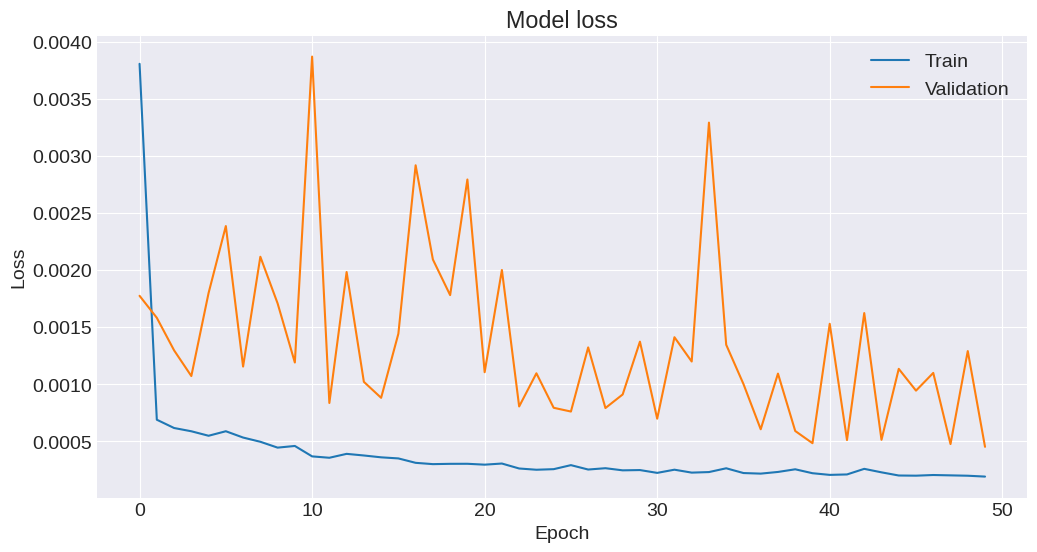

In [122]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [126]:
test_predicted = model.predict(X_test)
test_predicted[:5]

8/8 [==============================] - 1s 79ms/step


array([[0.4013542 ],
       [0.40435442],
       [0.4156727 ],
       [0.42135897],
       [0.41521817]], dtype=float32)

In [133]:
test_inverse_predicted = scaler.inverse_transform(test_predicted)
print(test_inverse_predicted[:5])

[[1412.1058]
 [1417.6663]
 [1438.6428]
 [1449.1814]
 [1437.8005]]
